# Deep Neural Network for Classification
In this exercise, I implement a Deep Neural Network (DNN) model to recognize Tibetan handwriting numerals.The samples of this dataset can be found in the following figure. The details of this dataset can be referred to: https://github.com/bat67/TibetanMNIST.

In [1]:
import numpy as np
from DNN import Activator,FullConnectedLayer,Network

In [2]:
A = np.load('train.npz')
b = np.load('test.npz')
train_image, train_label, test_image, test_label = A['image'], A['label'], b['image'], b['label']
test_label = test_label.astype(int)
train_label = train_label.astype(int)

In [3]:
def one_hot(df):
    a = df.size
    y_one_hot = np.zeros([a, np.amax(df)+1])
    y_one_hot[np.arange(a), df.reshape(1, df.size)]  = 1
    return(y_one_hot)
train_label = one_hot(train_label)
test_label = one_hot(test_label)
train_image_2D = train_image.reshape(12000, 28*28).astype('float32')  
test_image_2D = test_image.reshape(5768, 28*28).astype('float32')  
train_image_norm = train_image_2D/255
test_image_norm = test_image_2D/255
last_error_ratio = 1.0
epoch = 0
train_image_norm=np.array(train_image_norm)
train_label=np.array(train_label)
test_image_norm=np.array(test_image_norm)
test_label=np.array(test_label)
print('樣本數據集的個數：%d' % len(train_image_norm))
print('測試數據集的個數：%d' % len(test_image_norm))

樣本數據集的個數：12000
測試數據集的個數：5768


In [11]:
network = Network([784, 128, 10])  # input:784，神經元:128，output:10
a1 = network.train(train_label, train_image_norm,test_label,test_image_norm, 0.1, 100)  

[Epoch 1]: Training Loss：1.7763, Training Accuracy : 90.21%, Test Accuracy : 89.79%
[Epoch 2]: Training Loss：1.6234, Training Accuracy : 92.85%, Test Accuracy : 91.54%
[Epoch 3]: Training Loss：1.5896, Training Accuracy : 94.46%, Test Accuracy : 92.41%
[Epoch 4]: Training Loss：1.5693, Training Accuracy : 95.13%, Test Accuracy : 93.17%
[Epoch 5]: Training Loss：1.5553, Training Accuracy : 95.54%, Test Accuracy : 93.46%
[Epoch 6]: Training Loss：1.5447, Training Accuracy : 96.17%, Test Accuracy : 94.05%
[Epoch 7]: Training Loss：1.5362, Training Accuracy : 96.73%, Test Accuracy : 94.63%
[Epoch 8]: Training Loss：1.5293, Training Accuracy : 97.35%, Test Accuracy : 95.01%
[Epoch 9]: Training Loss：1.5232, Training Accuracy : 97.71%, Test Accuracy : 95.39%
[Epoch 10]: Training Loss：1.5180, Training Accuracy : 97.94%, Test Accuracy : 95.54%
[Epoch 11]: Training Loss：1.5135, Training Accuracy : 98.09%, Test Accuracy : 95.54%
[Epoch 12]: Training Loss：1.5097, Training Accuracy : 98.34%, Test Accurac

[Epoch 98]: Training Loss：1.4701, Training Accuracy : 99.62%, Test Accuracy : 96.58%
[Epoch 99]: Training Loss：1.4700, Training Accuracy : 99.62%, Test Accuracy : 96.57%
[Epoch 100]: Training Loss：1.4699, Training Accuracy : 99.62%, Test Accuracy : 96.58%


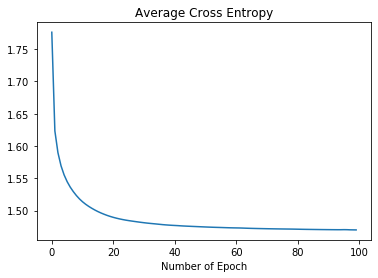

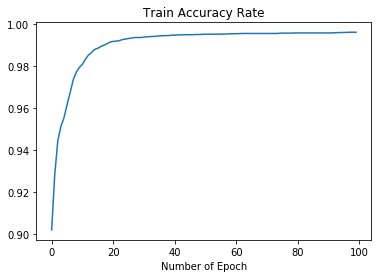

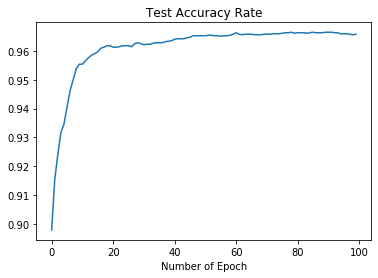

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

b1 = ['Average Cross Entropy','Train Accuracy Rate','Test Accuracy Rate']
a3 = list(range(100))
a2 = np.array(a1[0])
for i in range(a2.shape[1]):
    a2 = np.array(a1[0])
    plt.figure()
    a = plt.plot(a3, a2[:,i])
    plt.xlabel('Number of Epoch')
    plt.title(b1[i])
    plt.show()
    #plt.savefig(b1[i]+'.png')

In [19]:
test_accuracy,cunfusmat = network.accuracy_rate(test_image_norm,test_label)
cunfusmat = pd.DataFrame(cunfusmat,columns=list(range(10)))
cunfusmat

,0,1,2,3,4,5,6,7,8,9
0,657.0,3.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
1,2.0,657.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,10.0,540.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,30.0,559.0,1.0,1.0,4.0,1.0,2.0,0.0
4,1.0,0.0,0.0,1.0,616.0,0.0,3.0,0.0,8.0,22.0
5,0.0,0.0,0.0,2.0,2.0,399.0,1.0,2.0,1.0,0.0
6,1.0,0.0,0.0,0.0,2.0,2.0,491.0,5.0,1.0,0.0
7,1.0,0.0,0.0,0.0,3.0,5.0,2.0,435.0,1.0,2.0
8,0.0,0.0,0.0,1.0,4.0,0.0,1.0,1.0,565.0,0.0
9,0.0,0.0,2.0,0.0,17.0,2.0,1.0,3.0,1.0,652.0


# Discuss the evolution of latent features at different training stage
在這裡我多加了一層神經元為 2 的 hidden layer,讓最後一層的輸出為一個12000*2 的陣列,分別迭代 20、80 次之後,得到下方的散部圖。由於我選用的
activate function 是 sigmoid 所以值會在 0 到 1 之間。由下圖可很明顯的知道在80 次時各個數字分布的區塊比 20 次時還要明確的許多。

[Epoch 1]: Training Loss：2.2768, Training Accuracy : 31.82%, Test Accuracy : 30.65%
[Epoch 2]: Training Loss：2.1075, Training Accuracy : 42.71%, Test Accuracy : 41.24%
[Epoch 3]: Training Loss：2.0368, Training Accuracy : 52.58%, Test Accuracy : 51.46%
[Epoch 4]: Training Loss：1.9993, Training Accuracy : 66.08%, Test Accuracy : 64.86%
[Epoch 5]: Training Loss：1.9768, Training Accuracy : 63.41%, Test Accuracy : 62.88%
[Epoch 6]: Training Loss：1.9470, Training Accuracy : 70.27%, Test Accuracy : 68.12%
[Epoch 7]: Training Loss：1.9176, Training Accuracy : 72.49%, Test Accuracy : 70.61%
[Epoch 8]: Training Loss：1.8964, Training Accuracy : 73.98%, Test Accuracy : 71.71%
[Epoch 9]: Training Loss：1.8763, Training Accuracy : 80.99%, Test Accuracy : 78.28%
[Epoch 10]: Training Loss：1.8601, Training Accuracy : 84.89%, Test Accuracy : 81.83%
[Epoch 11]: Training Loss：1.8474, Training Accuracy : 85.97%, Test Accuracy : 82.68%
[Epoch 12]: Training Loss：1.8391, Training Accuracy : 85.79%, Test Accurac

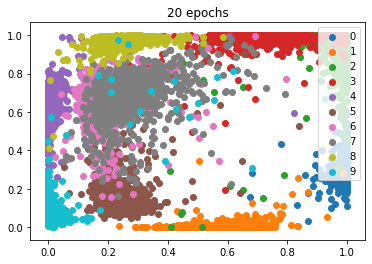

[Epoch 1]: Training Loss：2.2977, Training Accuracy : 23.62%, Test Accuracy : 23.06%
[Epoch 2]: Training Loss：2.1334, Training Accuracy : 42.73%, Test Accuracy : 42.39%
[Epoch 3]: Training Loss：2.0451, Training Accuracy : 44.06%, Test Accuracy : 43.55%
[Epoch 4]: Training Loss：2.0272, Training Accuracy : 44.32%, Test Accuracy : 44.02%
[Epoch 5]: Training Loss：2.0146, Training Accuracy : 60.66%, Test Accuracy : 60.47%
[Epoch 6]: Training Loss：1.9753, Training Accuracy : 69.44%, Test Accuracy : 68.36%
[Epoch 7]: Training Loss：1.9424, Training Accuracy : 73.00%, Test Accuracy : 71.58%
[Epoch 8]: Training Loss：1.9131, Training Accuracy : 74.48%, Test Accuracy : 72.94%
[Epoch 9]: Training Loss：1.8876, Training Accuracy : 71.58%, Test Accuracy : 70.56%
[Epoch 10]: Training Loss：1.8702, Training Accuracy : 75.59%, Test Accuracy : 74.71%
[Epoch 11]: Training Loss：1.8588, Training Accuracy : 75.97%, Test Accuracy : 74.64%
[Epoch 12]: Training Loss：1.8479, Training Accuracy : 80.27%, Test Accurac

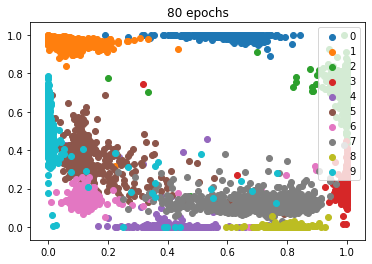

In [28]:
n = [20,80]
import matplotlib.pyplot as plt
for j in n :
    network = Network([784, 128,2,10])  # 定義一個輸入節點784，第一層神經元128，第二層神經元2，輸出10
    a1 = network.train(train_label, train_image_norm,test_label,test_image_norm, 0.3, j)
    n1 = a1[1].reshape(12000,2) #將倒數第二層的oupt轉乘12000，2
    label = A['label']
    label.reshape(-1,1)
    for i in range(10):    
        n2 = n1[label==i]
        plt.scatter(n2[:,0],n2[:,1],label=str(i))
        plt.legend(loc='upper right')
    #plt.savefig(str(j)+'.png')
    plt.title('%d epochs'%j)
    plt.show()